In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss


In [53]:
# 📥 Load Iris dataset from sklearn
iris = load_iris()


In [54]:
# 🎯 Features and target
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target


In [55]:
# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [56]:
# 🧠 Build OvR Logistic Regression model
model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)


C:\Users\sudha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='ovr')

In [57]:
# 🔮 Predictions and probabilities
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)


In [58]:
# 📊 Evaluation metrics
acc_score = accuracy_score(y_test, y_pred)
con_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
logloss = log_loss(y_test, y_proba)


In [59]:
# 🖨️ Display all metrics
print("✅ Accuracy:", acc_score)
print("\n📉 Confusion Matrix:\n", con_matrix)
print("\n📋 Classification Report:\n", class_report)
print("🔐 Log Loss:", logloss)


✅ Accuracy: 0.9333333333333333

📉 Confusion Matrix:
 [[14  0  0]
 [ 0  6  2]
 [ 0  0  8]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.75      0.86         8
           2       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.92      0.92        30
weighted avg       0.95      0.93      0.93        30

🔐 Log Loss: 0.3107478337825033


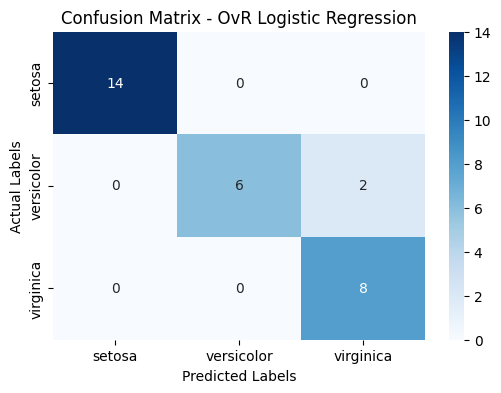

In [60]:
# 🔥 Visualize Confusion Matrix as a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(con_matrix,
            annot=True,
            cmap='Blues',
            fmt='d',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - OvR Logistic Regression')
plt.show()


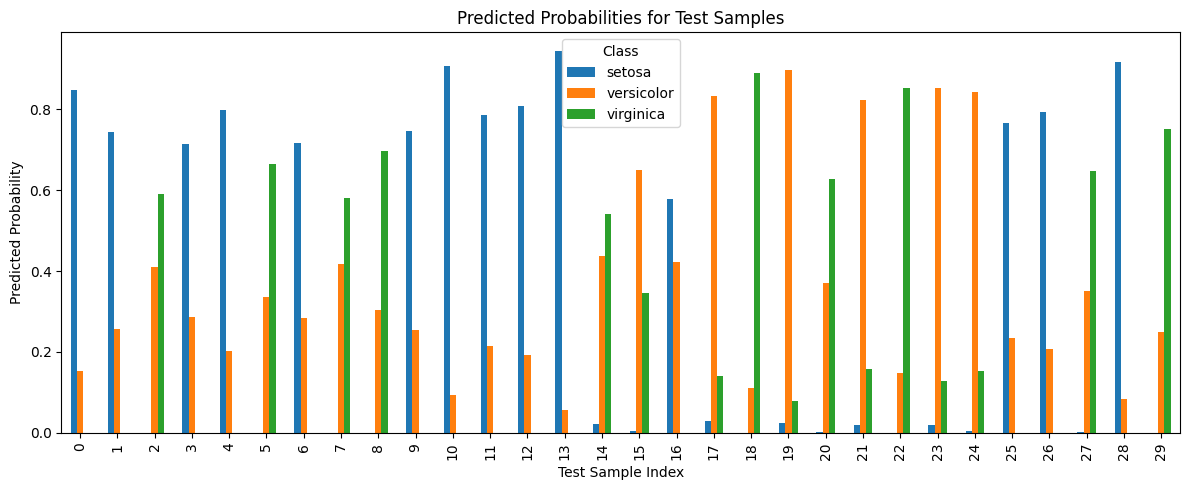

In [61]:
# 📈 Visualize Predicted Probabilities for test samples
proba_df = pd.DataFrame(y_proba, columns=iris.target_names)

proba_df.plot(kind='bar',
              figsize=(12, 5),
              title="Predicted Probabilities for Test Samples")
plt.xlabel('Test Sample Index')
plt.ylabel('Predicted Probability')
plt.legend(title='Class')
plt.tight_layout()
plt.show()
